In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.manifold import TSNE


#1. Cargue el conjunto de datos MNIST

Use KERAS para cargar el conjunto de datos MNIST, una vez cargado añada ruido aleatorio, tanto en el conjunto de entrenamiento como el de validación. Deberá obtener cuatro conjuntos: entrenamiento+ruido, test+ruido, entrenamiento simple y test simple.

Muestre un ejemplo para cada una de las etiquetas con y sin ruido (Tómelos del conjunto de entrenamiento).

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(X_train_simple, y_train_simple), (X_test_simple, y_test_simple) = keras.datasets.mnist.load_data()

In [ ]:
X_train_simple = X_train_simple.reshape(60000,784)
X_test_simple = X_test_simple.reshape(10000, 784)

para nosotras del futuro.. recordar esto
Random normal es para generar números aleatorios a partir de una distribución gaussiana
loc es para cuadrar el centro de la campana o distribución
scale es para controlar la dispersión de los dato

In [ ]:
ruidito_train = np.random.normal(loc = 0.5, scale = 0.5, size = X_train_simple.shape)
ruidito_test = np.random.normal(loc = 0.5, scale = 0.5, size = X_test_simple.shape)

In [ ]:
X_train_ruido = X_train_simple + ruidito_train
X_test_ruido = X_test_simple + ruidito_test

In [ ]:
X_train_ruido = np.clip(X_train_ruido, 0., 1.)
X_test_ruido = np.clip(X_test_ruido, 0., 1.)


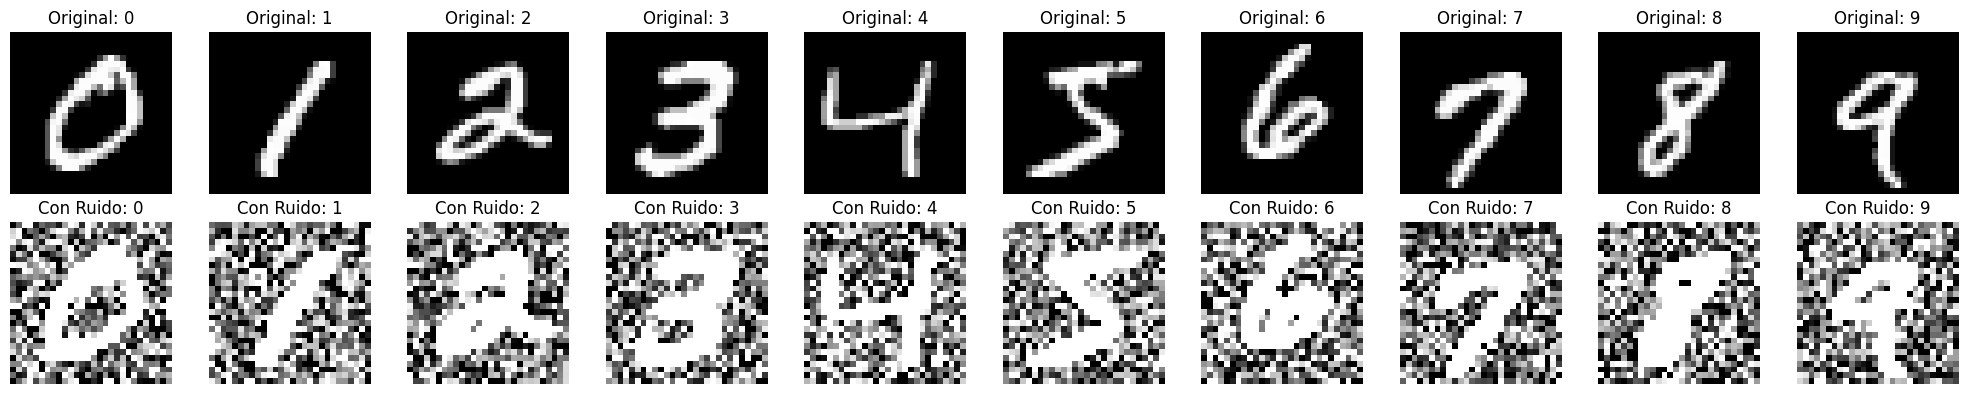

In [ ]:
labels = list(range(10))
plt.figure(figsize=(20, 4))

for i, label in enumerate(labels):
    idx = np.where(y_train_simple == label)[0][0]

    plt.subplot(2, 10, i + 1)
    plt.imshow(X_train_simple[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Original: {label}')
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(X_train_ruido[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Con Ruido: {label}')
    plt.axis('off')

#para que se ven gonitos
plt.tight_layout()
plt.show()

# 2. Proponga una estructura neuronal

En este caso, construirá una red neuronal que sea capaz de limpiar nuestras imágenes. Por lo cual, los conjuntos con ruido serán los datos de entrada y las imágenes limpias la salida. Tomando esto en consideración, proponga una estructura neuronal capaz de realizar dicha tarea.

**Pistas:**


1.   Recuerde aplanar las imágenes usando reshape o una capa de flatten.
2.   Recuerde que la entrada como la salida serán vectores de 784.
3.   La capa intermedia deberá tener menos neuronas que la de entrada y salida.
4.   Piense si esto es una tarea de clasificación o de regresión para que pueda seleccionar adecuadamente la función de coste.
4.   Deberá realizar pruebas para determinar las características de la red neuronas (regularizaciones, valores de learning rate. )




In [ ]:
X_train_simple = np.clip(X_train_simple, 0., 1.)
X_test_simple = np.clip(X_test_simple, 0.,1)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_dim = 784, activation = 'relu', use_bias = False, name = 'capa_entrada'))
model.add(keras.layers.Dense(50, activation = 'relu', use_bias = False, name = 'capa_intermedia'))
model.add(keras.layers.Dense(784, activation = 'sigmoid', use_bias = False, name = 'capa_salida'))

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate= 1e-4), loss = 'mse', metrics=['mae'] )

# 3. Entrena la red neuronal y demuestre su desempeño

Entre la red neuronal y demuestre el desempeñó. Justifique su elección tanto de función de perdida como de métrica de evaluación. Adicionalmente, muestre los resultados obtenidos para el conjunto de test (recuerde convertir su vector de 784 a una imagen de 28x28).

In [ ]:
model.fit(X_train_ruido, X_train_simple, validation_data = (X_test_ruido, X_test_simple) , epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0958 - mae: 0.1991 - val_loss: 0.0715 - val_mae: 0.1546
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0636 - mae: 0.1360 - val_loss: 0.0579 - val_mae: 0.1229
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0559 - mae: 0.1185 - val_loss: 0.0523 - val_mae: 0.1127
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0504 - mae: 0.1085 - val_loss: 0.0474 - val_mae: 0.1039
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0459 - mae: 0.0999 - val_loss: 0.0436 - val_mae: 0.0956


In [ ]:
cleaned_images_flatten = model.predict(X_test_ruido)

313/313 [==============================] - 1s 2ms/step


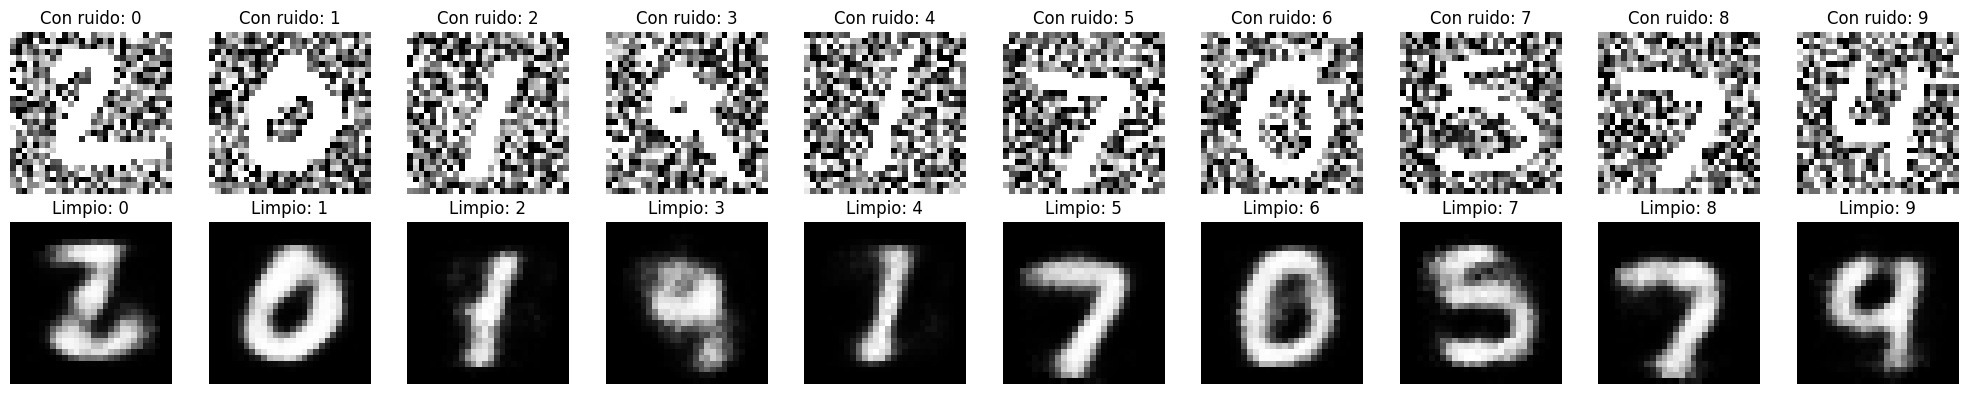

In [ ]:
labels = list(range(10))
plt.figure(figsize=(20, 4))

for i, label in enumerate(labels):
    idx = np.where(y_train_simple == label)[0][0]

    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test_ruido[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Con ruido: {label}')
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    plt.imshow(cleaned_images_flatten[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Limpio: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 4. Extraiga la representación

Recuerde que la capa intermedia DEBE tener un tamaño menor a las capas de entrada y de salida. Extraiga los valores de dicha capa para cada una de las imágenes. Use una técnica de reducción de dimensionalidad (PSA, TSNE ...) y observe un diagrama de dispersión de la representación neuronal etiquetado con cada una de las clases del conjunto de datos.

In [ ]:
outputs = model.layers[1].output
modelito = keras.models.Model(inputs=model.input, outputs=outputs)
salidas = modelito.predict(X_test_ruido)


313/313 [==============================] - 1s 2ms/step


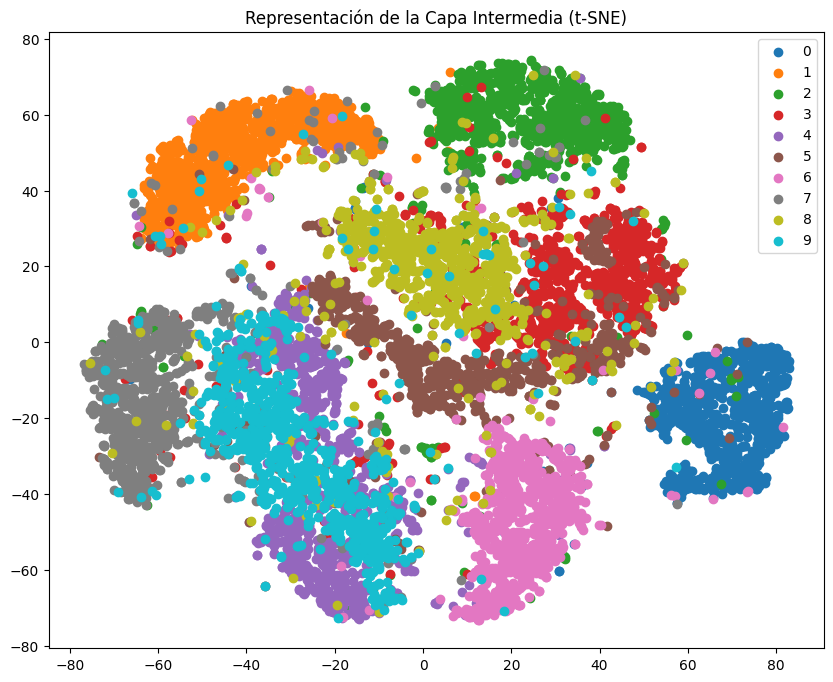

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
representations_tsne = tsne.fit_transform(salidas)

plt.figure(figsize=(10, 8))
for i in range(10):
    indices = np.where(y_test_simple == i)
    plt.scatter(representations_tsne[indices, 0], representations_tsne[indices, 1], label=str(i))
plt.legend()
plt.title('Representación de la Capa Intermedia (t-SNE)')
plt.show()
